In [1]:
# Import libraries
import numpy as np
import random
import scipy.stats as ss
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from IPython.display import Math, Latex
from IPython.core.display import Image
random.seed(11)
%matplotlib inline

**Probability distribution** is a function that provides the likelihood of each outcome of a random event or experiment.

In the case of random variables, to define a probability distribution, we first distinguish between discrete and continuous random variables.

**Discrete random variables** are those that take only countable distinct values. An example of a discrete random variable is a coin toss, which has two possible values: heads and tails. The probability distribution of a discrete variable is a list of probabilities associated with each possible outcome, often called a **probability mass function (pmf)**. Note that the probability of each outcome should be in the interval (0, 1), and the sum of all probabilities should be equal to 1.

**Continuous random variables** are those that take an infinite number of possible values. An example of a continuous random variable is the height of students in a class. The probability distribution of a continuous random variable is often called a **probability density function (pdf)**. Note that because the continuous random variable is defined over an interval, the probability of an interval is the area under the curve (integral of the pdf in that area). Here too, the probability of a specific range of values should be in the interval (0, 1), and the total area under the curve should be equal to 1. At the same time, the probability of a single point (interval of length 0) is 0.

An important type of distribution relevant to both discrete and continuous random variables is the **cumulative distribution function (cdf)**, which represents the probability that a random variable X is less than or equal to a certain value x. For discrete variables, you can obtain it by summing the probabilities of all possible outcomes less than or equal to x. For continuous variables, you obtain it by integrating the pdf up to x.

Let's explore some of the most commonly used probability distributions using Python libraries for statistics.


### Uniform

A uniform distribution in an interval [a, b] means that all intervals of the same length within this range have an equal probability. The probability density function (pdf) of a uniform random variable is given by:
$$
\begin{equation}
  f(x) =
    \begin{cases}
      \frac{1}{b-a} & \text{for} \ a \leq x \leq b, \\
      0  & \text{for} \ x < a \ \text{or} \ x > b
    \end{cases}       
\end{equation}
$$

The **scipy.stats.uniform** object can be used to generate and work with a uniform distribution.

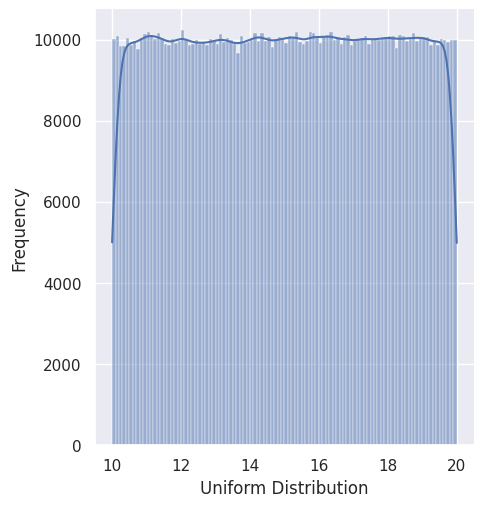

In [2]:
# Generate 1000000 uniform random variables in the interval [10, 20] in Python
n = 1000000
a = 10
b = 20
uniform_rvs = ss.uniform.rvs(loc=a, scale=b-a, size=n)

# Display uniform random variables (uniform_rvs)
ax = sns.displot(uniform_rvs,
                 bins=100,
                 kde=True
                )

ax.set(xlabel='Uniform Distribution', ylabel='Frequency')
plt.show()

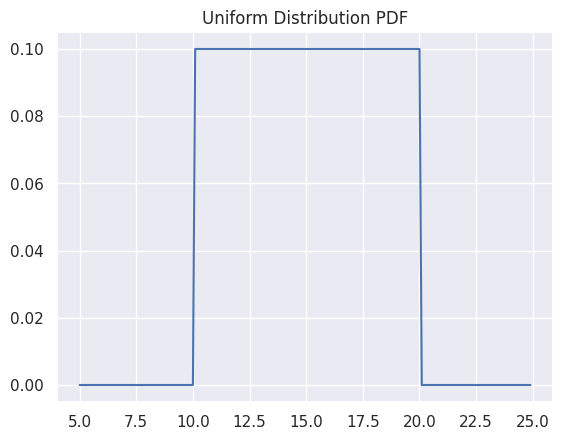

In [3]:
# Measure probability density function (interval [10, 20])
# Create an array of values in the [5, 25] interval with 0.1 difference
x = np.arange(5, 25, 0.1)

# Calculate the PDF using pdf method
pdf = ss.uniform.pdf(x=x, loc=10, scale=20-10)

# Display PDF
sns.lineplot(x=x, y=pdf)

plt.title('Uniform Distribution PDF')
plt.show()

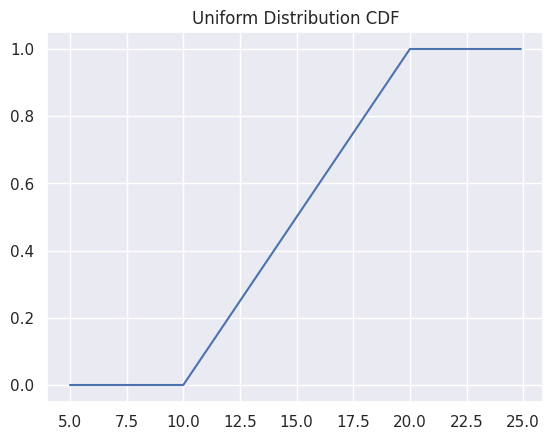

In [4]:
# Measure cumulative distribution function using cdf method (interval [10, 20])
cdf = ss.uniform.cdf(x=x, loc=10, scale=20-10)

# Display CDF
sns.lineplot(x=x, y=cdf)

plt.title('Uniform Distribution CDF')
plt.show()

In [5]:
# Calculate the probability that a value will be greater than 12 and less than 16 (interval [10, 20])
prob_less_than_12 = ss.uniform.cdf(12, loc=10, scale=20-10)
prob_less_than_16 = ss.uniform.cdf(16, loc=10, scale=20-10)

# Target probability is the difference of the two
target_probability = prob_less_than_16 - prob_less_than_12
print(target_probability)

0.39999999999999997


###Normal

The normal (Gaussian) distribution is a continuous probability distribution defined by its mean and variance (or standard deviation). It takes the form of a bell-shaped curve, symmetrical about the mean, where data close to the mean occurs more frequently than data farther away. This distribution finds extensive application in representing various random variables in nature and the social sciences. Its significance in statistics is particularly notable due to its connection to the [central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem).

The probability density function (PDF) for a normal random variable with a mean **$\mu$** and standard deviation **$\sigma$** is given by:
$$
f(x| \mu, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$
Utilizing the **scipy.stats.norm** object proves highly beneficial for generating and working with a normal distribution in practical scenarios.

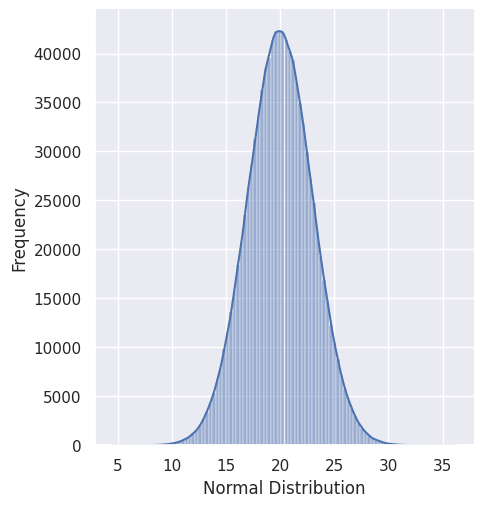

In [6]:
# Generate 1000000 normal random variables with mean 20 and standard deviation 3 in Python
n = 1000000
mu = 20
std_dev = 3
normal_rvs = ss.norm.rvs(loc=mu, scale=std_dev, size=n)

# Display histogram and KDE for normal random variables
ax = sns.displot(normal_rvs, bins=100, kde=True)

ax.set(xlabel='Normal Distribution', ylabel='Frequency')
plt.show()

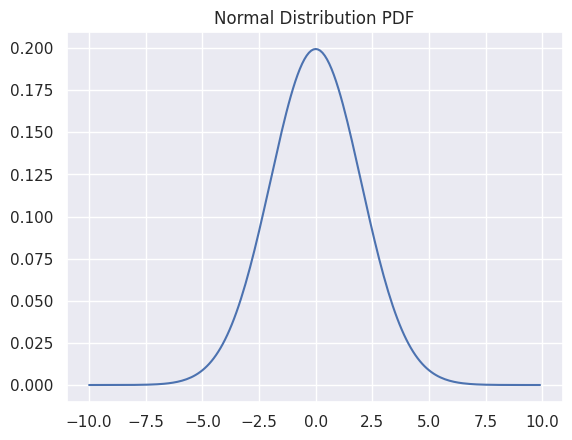

In [7]:
# Measure probability density function (mean = 0, standard deviation = 2)
# Create an array of values in the interval (-10, 10) with 0.1 difference
x = np.arange(-10, 10, 0.1)

# Calculate the PDF
pdf = ss.norm.pdf(x=x, loc=0, scale=2)

# Display PDF
sns.lineplot(x=x, y=pdf)

plt.title('Normal Distribution PDF')
plt.show()

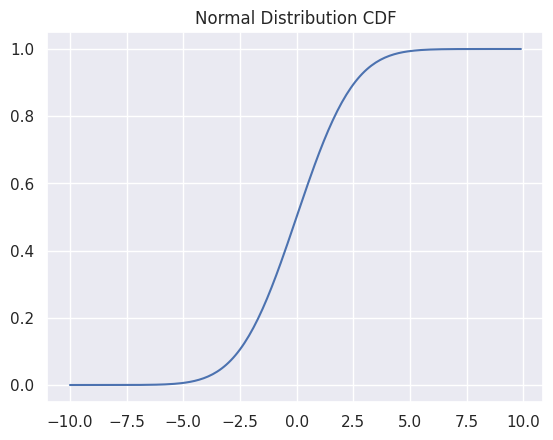

In [8]:
# Measure cumulative distribution function (mean = 0, standard deviation = 2)
x = np.arange(-10, 10, 0.1)
cdf = ss.norm.cdf(x=x, loc=0, scale=2)

# Display CDF
sns.lineplot(x=x, y=cdf)

plt.title('Normal Distribution CDF')
plt.show()

In [9]:
# Calculate the probability that a value of a normal random variable will be greater than 5 (mean = 0, standard deviation = 2)
prob_greater_than_5 = 1 - ss.norm.cdf(5, loc=0, scale=2)

print(prob_greater_than_5)

0.006209665325776159


###Exponential

The Exponential distribution is another widely used continuous distribution that characterizes the time between two events in a [Poisson process](https://en.wikipedia.org/wiki/Poisson_point_process). It is defined by the rate parameter **$λ$** and is governed by the following probability density function:
$$
f(x;\lambda)=
    \begin{cases}
        \lambda e^{-\lambda x} & x \geq 0, \\
        0 & x < 0
    \end{cases}
$$

In Python, you can generate and manipulate the Exponential distribution using the **scipy.stats.expon** object.

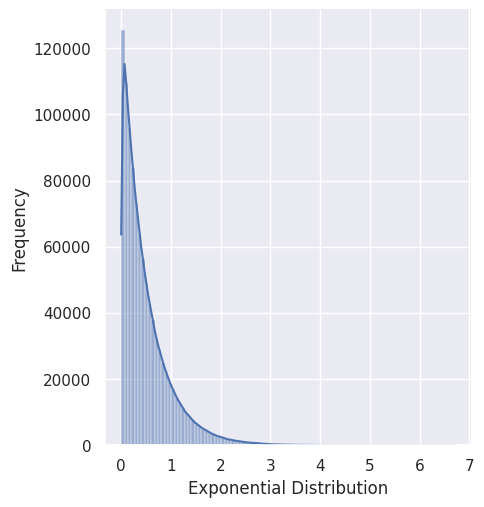

In [10]:
# Generate 1000000 exponential random variables with a rate of 2
n = 1000000
rate = 2
exp_rvs = ss.expon.rvs(loc=0, scale=1/rate, size=n)

# Display exponential random variables
ax = sns.displot(exp_rvs, bins=100, kde=True)

ax.set(xlabel='Exponential Distribution', ylabel='Frequency')
plt.show()

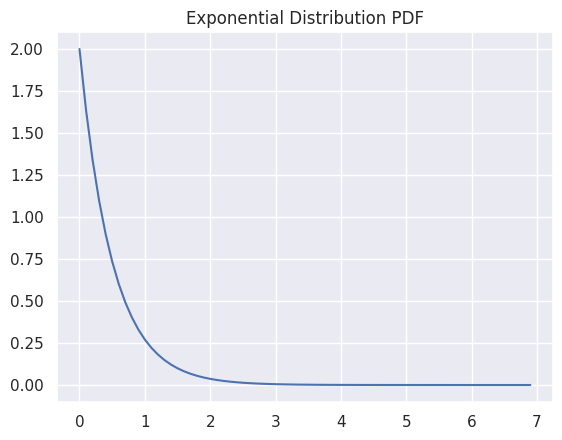

In [11]:
# Measure probability density function (rate = 2)
# Create an array of values in the interval (0, 7) with 0.1 difference
x = np.arange(0, 7, 0.1)

# Calculate the probability density function (PDF)
pdf = ss.expon.pdf(x=x, scale=1/2)

# Display PDF
sns.lineplot(x=x, y=pdf)

plt.title('Exponential Distribution PDF')
plt.show()

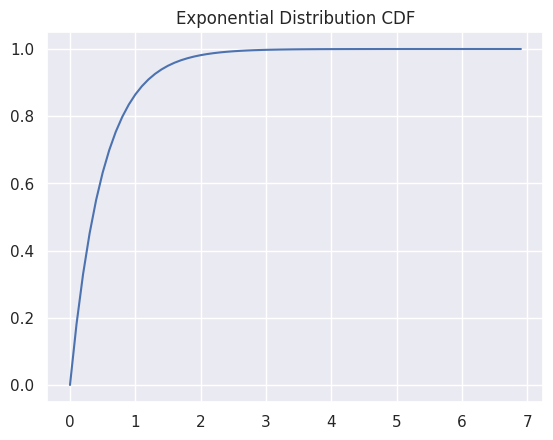

In [12]:
# Measure cumulative distribution function (rate = 2)
cdf = ss.expon.cdf(x=x, scale=1/2)

# Display cumulative distribution function (CDF)
sns.lineplot(x=x, y=cdf)

plt.title('Exponential Distribution CDF')
plt.show()

In [13]:
# Calculate the probability that a value of an exponential random variable will be less than 1 (rate = 2)
prob_less_than_1 = ss.expon.cdf(1, loc=0, scale=1/2)

print(prob_less_than_1)

0.8646647167633873


###Poisson

The Poisson distribution is a discrete probability distribution used to model the number of events occurring in a fixed time interval, assuming these events are independent and occur with a constant average rate. The distribution is defined by the rate parameter $λ$ and is characterized by the following probability mass function:
$$
P(k \ \text{events in interval}) = \frac{\lambda^k}{k!} e^{-\lambda}
$$

In Python, you can generate and manipulate Poisson random variables using the **scipy.stats.poisson** object.

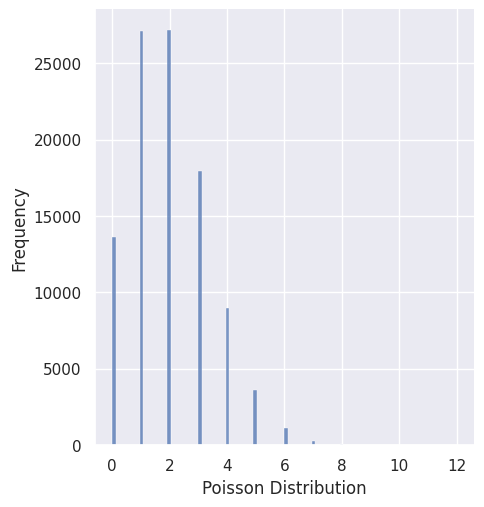

In [14]:
# Generate 100000 Poisson random variables with a rate of 2
n = 100000
rate = 2
poisson_rvs = ss.poisson.rvs(mu=rate, size=n)

# Display Poisson random variables
ax = sns.displot(poisson_rvs, bins=100, kde=False)

ax.set(xlabel='Poisson Distribution', ylabel='Frequency')
plt.show()

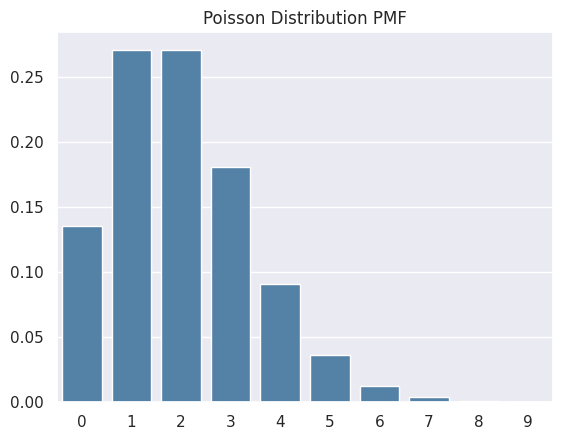

In [15]:
# Measure probability mass function (rate = 2)
# Create an array of values in the interval (0, 10) with 1 difference
x = np.arange(0, 10, 1)

# Calculate the probability mass function (PMF)
pmf = ss.poisson.pmf(k=x, mu=2)

# Display PMF with a bar plot
sns.barplot(x=x, y=pmf, color='steelblue')

plt.title('Poisson Distribution PMF')
plt.show()

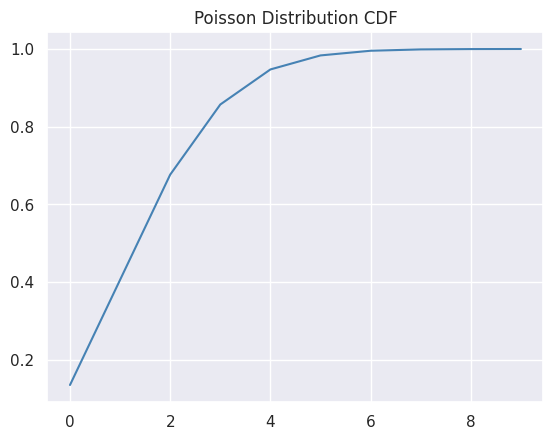

In [16]:
# Measure cumulative distribution function (rate = 2)
cdf = ss.poisson.cdf(k=x, mu=2)

# Display CDF with a line plot
sns.lineplot(x=x, y=cdf, color='steelblue')

plt.title('Poisson Distribution CDF')
plt.show()

In [17]:
# Calculate the probability of the occurence of 5 events for a poisson random variable with rate 2

prob_of_5_events = ss.poisson.pmf(5, mu = 2)

print(prob_of_5_events)

0.03608940886309672


###Bernoulli

The Bernoulli distribution is a discrete probability distribution with two possible outcomes (1: success, 0: failure) in a single trial. The Bernoulli random variable is defined by the parameter **p** (probability of success) and is characterized by the following probability mass function:
$$
f(k;p) = p^k(1-p)^{1-k} \quad \text{for} \ k \in \{0,1\}
$$
In Python, you can generate and manipulate Bernoulli random variables using the **scipy.stats.bernoulli** object.

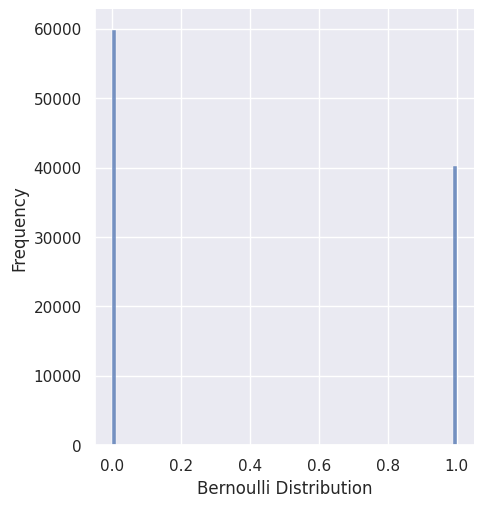

In [18]:
# Generate 100,000 Bernoulli random variables with a parameter of 0.4
n = 100000
p = 0.4
bernoulli_rvs = ss.bernoulli.rvs(p=p, size=n)

# Display Bernoulli random variables
ax = sns.displot(bernoulli_rvs, bins=100, kde=False)

ax.set(xlabel='Bernoulli Distribution', ylabel='Frequency')
plt.show()

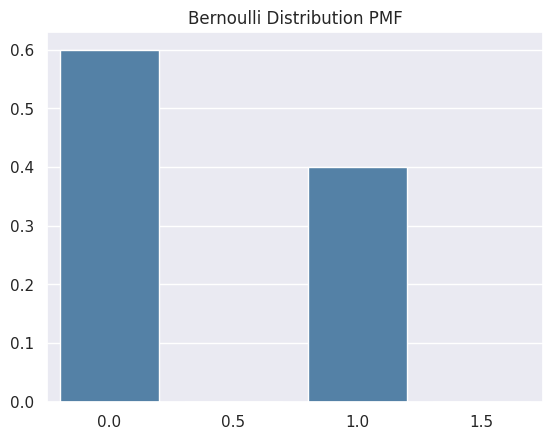

In [19]:
# Measure probability mass function (p = 0.4)
# Create an array of values in the interval (0, 2) with a 0.5 difference
x = np.arange(0, 2, 0.5)

# Calculate the probability mass function (PMF)
pmf = ss.bernoulli.pmf(k=x, p=0.4)

# Display PMF with a bar plot
sns.barplot(x=x, y=pmf, color='steelblue')

plt.title('Bernoulli Distribution PMF')
plt.show()

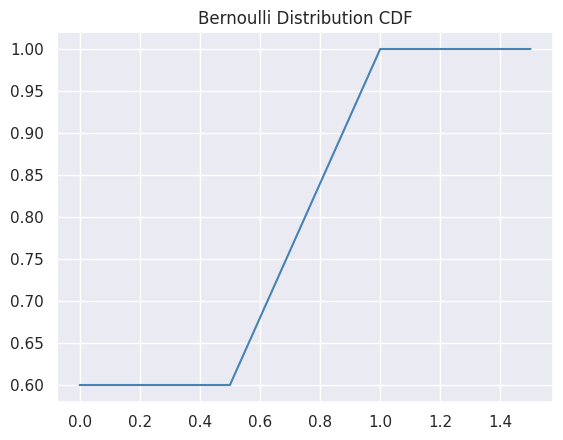

In [20]:
# Measure cumulative distribution function
cdf = ss.bernoulli.cdf(k = x, p = p)

# Display CDF
sns.lineplot(x = x, y = cdf, color = 'steelblue')

plt.title('Bernoulli Distribution CDF')
plt.show()

In [21]:
# Calculate the probability of a success with rate 0.4

prob_of_a_success = ss.bernoulli.pmf(k = 1, p = 0.4)

print(prob_of_a_success)

0.4


###Binomial

The Binomial distribution is a discrete probability distribution used to model the number of successes in n independent Bernoulli trials. It is defined by the parameters **n** (number of trials) and **p** (success rate of each trial). The probability mass function is as follows:
$$f(k,n,p) = Pr(k; n,p) = Pr(X = k) = {n \choose k} p^k (1-p)^{n-k}$$
In Python, you can generate and manipulate Binomial random variables using the **scipy.stats.binom** object.

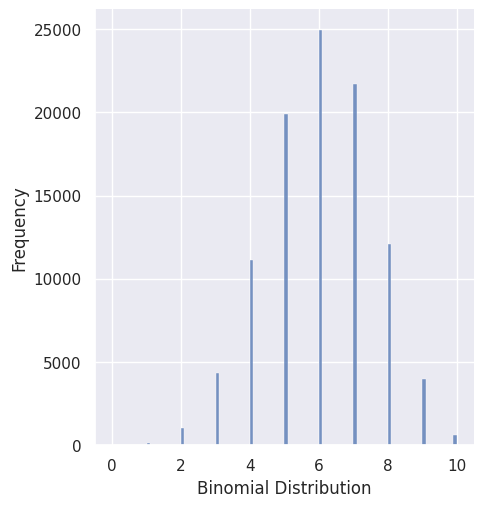

In [22]:
# Generate 100,000 Binomial random variables with n trials and a success rate of p
num_samples = 100000
num_trials = 10
success_rate = 0.6
binomial_rvs = ss.binom.rvs(n=num_trials, p=success_rate, size=num_samples)

# Display Binomial random variables
ax = sns.displot(binomial_rvs, bins=100, kde=False)

ax.set(xlabel='Binomial Distribution', ylabel='Frequency')
plt.show()

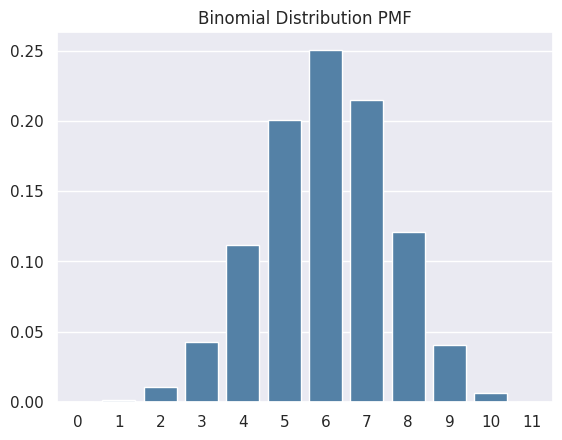

In [23]:
# Measure probability mass function (n = 10, p = 0.6)
# Create an array of values in the interval (0, 12) with a 1 difference
x = np.arange(0, 12, 1)

# Calculate the probability mass function (PMF)
pmf = ss.binom.pmf(k=x, n=10, p=0.6)

# Display PMF with a bar plot
ax = sns.barplot(x=x, y=pmf, color='steelblue')

ax.set_title('Binomial Distribution PMF')
plt.show()

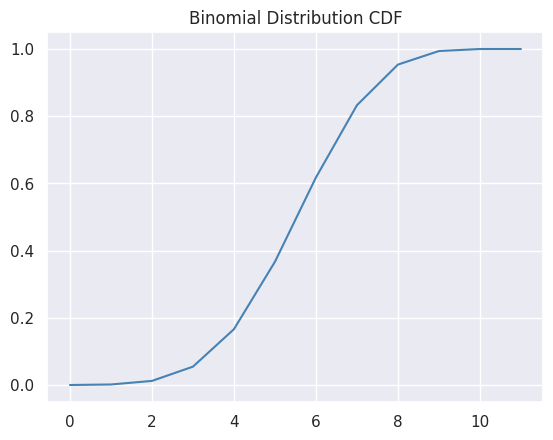

In [24]:
# Measure cumulative distribution function (n = 10, p = 0.6)
cdf = ss.binom.cdf(k=x, n=10, p=0.6)

# Display CDF with a line plot
ax = sns.lineplot(x=x, y=cdf, color='steelblue')

ax.set_title('Binomial Distribution CDF')
plt.show()

In [25]:
# Calculate the probability of getting 7 successes in 10 trials when the probability of a success is 0.6

prob_of_7_successes = ss.binom.pmf(k = 7, n = 10, p = 0.6)

print(prob_of_7_successes)

0.21499084799999976
